# Question 1:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

### Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [4]:
maxTemp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
minTemp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

Text(0, 0.5, 'Minimum & Maximum Temp')

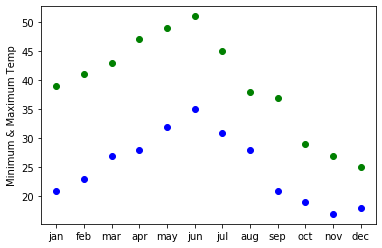

In [20]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.plot(months, maxTemp, 'go')
plt.plot(months, minTemp, 'bo')
plt.ylabel('Minimum & Maximum Temp')

#### with Cosine function

In [28]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.sin((times + time_offset) * 1.8 * np.pi / times.max()))

##### with Sine function

In [42]:
def yearly_temps_sine(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.sin((times + time_offset) * 1.8 * np.pi / times.max()))

### Output with Cosine

In [43]:
res_max, cov_max = optimize.curve_fit(yearly_temps, np.arange(12),
                                      maxTemp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, np.arange(12),
                                      minTemp, [-40, 20, 0])

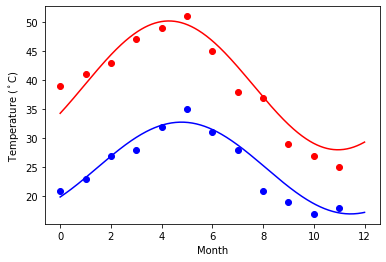

In [44]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(np.arange(12), maxTemp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(np.arange(12), minTemp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Output with Sine 

In [48]:
res_max, cov_max = optimize.curve_fit(yearly_temps_sine, np.arange(12),
                                      maxTemp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps_sine, np.arange(12),
                                      minTemp, [-40, 20, 0])

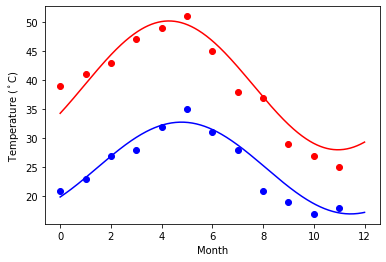

In [49]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(np.arange(12), maxTemp, 'ro')
plt.plot(days, yearly_temps_sine(days, *res_max), 'r-')
plt.plot(np.arange(12), minTemp, 'bo')
plt.plot(days, yearly_temps_sine(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Question 2:

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Pie Chart for Column SEX

In [67]:
sx=round((df['sex'].value_counts()/len(df))*100,3)
pd.DataFrame(sx)

,sex
male,64.351
female,35.573


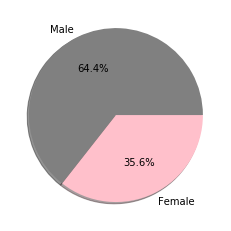

In [76]:
a, f = plt.subplots()
f.pie(df.sex.value_counts(), labels=['Male','Female'], shadow=True, autopct='%1.1f%%', colors=['grey','pink'])
plt.show()

#### scatterplot with the Fare paid and the Age, differ the plot color by gender

<Figure size 432x288 with 0 Axes>

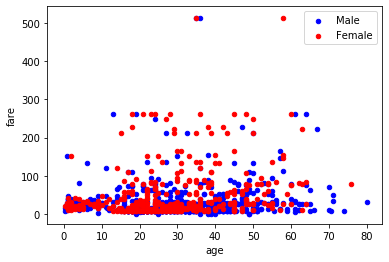

In [78]:
plt.figure()
cat = df[df.sex=='male'].plot.scatter('age', 'fare', color='blue', label='Male')
df[df.sex=='female'].plot.scatter('age', 'fare', color='red', label='Female', ax=cat)